1) Pengumpulan Data

Dataset yang digunakan adalah dataset yang bersumber dari link berikut : https://archive.ics.uci.edu/dataset/45/heart+disease Dataset yang dipakai adalah dataset dengan nama file "Cleveland.data", diharapkan sebelum memakai dataset tersebut anda dapat membaca deskripsi dataset yang ada di dalam file "heart-disease.names"

2) Menelaah Data

Masukan library yang dibutuhkan untuk menelaah data

In [7]:
import pandas as pd
import re
import numpy as np
import itertools

Load Data

masukkan dataset yang dibutuhkan dengan alamat penyimpanan yang tepat dan simpan kedalam sebuah variabel

In [8]:
dir = 'cleveland.data'

Membuat iterasi untuk membaca dataset

In [9]:
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

In [10]:
lines [0:10]

['1 0 63 1 -9 -9 -9',
 '-9 1 145 1 233 -9 50 20',
 '1 -9 1 2 2 3 81 0',
 '0 0 0 0 1 10.5 6 13',
 '150 60 190 90 145 85 0 0',
 '2.3 3 -9 172 0 -9 -9 -9',
 '-9 -9 -9 6 -9 -9 -9 2',
 '16 81 0 1 1 1 -9 1',
 '-9 1 -9 1 1 1 1 1',
 '1 1 -9 -9 name']

setelah membaca file dataset lakukan iterasi sesuai jumlah kolom dan baris yang ada pada dataset

In [11]:
data = itertools.takewhile(
lambda x: len(x) == 76,
(' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

In [12]:
df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1,0,63,1,-9,-9,-9,-9,1,145,...,1,1,1,1,1,1,1,-9,-9,name
1,2,0,67,1,-9,-9,-9,-9,4,160,...,1,1,1,1,1,1,1,-9,-9,name
2,3,0,67,1,-9,-9,-9,-9,4,120,...,2,2,1,1,1,7,3,-9,-9,name
3,4,0,37,1,-9,-9,-9,-9,3,130,...,1,1,1,1,1,1,1,-9,-9,name
4,6,0,41,0,-9,-9,-9,-9,2,130,...,1,1,1,1,1,1,1,-9,-9,name


Lalu menampilkan informasi dari file dataset yang sudah dimasukkan kedalam dataframe

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       282 non-null    object
 1   1       282 non-null    object
 2   2       282 non-null    object
 3   3       282 non-null    object
 4   4       282 non-null    object
 5   5       282 non-null    object
 6   6       282 non-null    object
 7   7       282 non-null    object
 8   8       282 non-null    object
 9   9       282 non-null    object
 10  10      282 non-null    object
 11  11      282 non-null    object
 12  12      282 non-null    object
 13  13      282 non-null    object
 14  14      282 non-null    object
 15  15      282 non-null    object
 16  16      282 non-null    object
 17  17      282 non-null    object
 18  18      282 non-null    object
 19  19      282 non-null    object
 20  20      282 non-null    object
 21  21      282 non-null    object
 22  22      282 non-null    ob

Pada kondisi dataset yang kita miliki terdapat kondisi khusus yang dimana sebelum memasuki tahap validasi data untuk tipe data object atau
string perlu dilakukan penghapusan fitur dikarenakan pada dataset ini nilai null disimbolkan dengan angka -9.0

In [14]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

Mengubah tipe data file dataset menjadi tipe data float sesuai dengan nilai null yaitu -9.0

In [15]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       282 non-null    float64
 4   5       282 non-null    float64
 5   6       282 non-null    float64
 6   7       282 non-null    float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      282 non-null    float64
 12  13      282 non-null    float64
 13  14      282 non-null    float64
 14  15      282 non-null    float64
 15  16      282 non-null    float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      282 non-null    float64
 22  23

3) Validasi Data

Pada tahap ini bertujuan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya

Mengubah nilai -9.0 menjadi nilai null value sesuai dengan deskripsi dataset

In [16]:
df.replace(-9.0, np.nan, inplace=True)

Menghitung jumlah nilai null value

In [17]:
df.isnull().sum()

1       0
2       0
3       0
4     282
5     282
     ... 
70      0
71      0
72      0
73    282
74    282
Length: 74, dtype: int64

In [18]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,63.0,1.0,NaN,NaN,NaN,NaN,1.0,145.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,160.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,120.0,1.0,...,NaN,2.0,2.0,1.0,1.0,1.0,7.0,3.0,NaN,NaN
3,0.0,37.0,1.0,NaN,NaN,NaN,NaN,3.0,130.0,0.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,41.0,0.0,NaN,NaN,NaN,NaN,2.0,130.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       0 non-null      float64
 4   5       0 non-null      float64
 5   6       0 non-null      float64
 6   7       0 non-null      float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      0 non-null      float64
 12  13      277 non-null    float64
 13  14      277 non-null    float64
 14  15      282 non-null    float64
 15  16      23 non-null     float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      280 non-null    float64
 22  23

4) Menentukan Object Data

Memilih 14 fitur yang akan digunakan sesuai dengan deskripsi dataset

In [20]:
df_selected = df.iloc[:, [1, 2, 7,8,10,14,17,30,36,38,39,42,49,56]]
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [21]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       282 non-null    float64
 1   3       282 non-null    float64
 2   8       282 non-null    float64
 3   9       282 non-null    float64
 4   11      282 non-null    float64
 5   15      282 non-null    float64
 6   18      282 non-null    float64
 7   31      282 non-null    float64
 8   37      282 non-null    float64
 9   39      282 non-null    float64
 10  40      282 non-null    float64
 11  43      280 non-null    float64
 12  50      280 non-null    float64
 13  57      282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


Mengganti nama kolom sesuai dengan 14 nama kolom yang ada pada deskripsi dataset

In [22]:
column_mapping = {
2: 'age',
3: 'sex',
8: 'cp',
9: 'trestbps',
11: 'chol',
15: 'fbs',
18: 'restecg',
31: 'thalach',
37: 'exang',
39: 'oldpeak',
40: 'slope',
43: 'ca',
50: 'thal',
57: 'target'
}
df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-22-a9bc0ddf4e0b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [23]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        280 non-null    float64
 12  thal      280 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


Menghitung jumlah fitur pada dataset

In [24]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
29.0  1.0  2.0  130.0     204.0  0.0  2.0      202.0    0.0    0.0      1.0    0.0  3.0   0.0       1
59.0  1.0  1.0  178.0     270.0  0.0  2.0      145.0    0.0    4.2      3.0    0.0  7.0   0.0       1
           4.0  138.0     271.0  0.0  2.0      182.0    0.0    0.0      1.0    0.0  3.0   0.0       1
                135.0     234.0  0.0  0.0      161.0    0.0    0.5      2.0    0.0  7.0   0.0       1
                110.0     239.0  0.0  2.0      142.0    1.0    1.2      2.0    1.0  7.0   2.0       1
                                                                                                   ..
51.0  1.0  4.0  140.0     298.0  0.0  0.0      122.0    1.0    4.2      2.0    3.0  7.0   3.0       1
                          299.0  0.0  0.0      173.0    1.0    1.6      1.0    0.0  7.0   1.0       1
52.0  0.0  3.0  136.0     196.0  0.0  2.0      169.0    0.0    0.1      2.0    0.0  3.0

5) Membersihkan Data

Sebelum melakukan pemodelan dilakukan pembersihan data agar model yang dihasilkan lebih akurat.

Menghitung jumlah null values yang ada diddalam dataset

In [25]:
df_selected.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          2
thal        2
target      0
dtype: int64

Berdasarkan output kode program diatas ada beberapa fitur yang hampir 90% datanya memiliki nilai null sehingga perlu dilakukan
penghapusan fitur menggunakan fungsi drop

In [26]:
columns_to_drop = ['ca', 'slope','thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)
df_selected.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

Dikarenakan masih ada nilai null dibeberapa kolom fitur maka akan dilakukan pengisian nilai null menggunakan nilai mean di setiap kolomnya

In [27]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

Mengubah nilai null menjadi nilai mean yang sudah ditentukan sebelumnya

In [28]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
dfClean = df_selected.fillna(value=fill_values)
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  target    282 non-null    float64
dtypes: float64(11)
memory usage: 24.4 KB


In [29]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

melalukan pengecekan terhadap duplikaksi data

In [30]:
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [31]:
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


Menghapus data yang memiliki duplikat

In [32]:
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [33]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0.0


In [34]:
dfClean['target'].value_counts()

0.0    157
1.0     50
3.0     32
2.0     31
4.0     12
Name: target, dtype: int64

Masukkan library

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

Mencari korelasi antar fitur

In [36]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,-0.091125,0.077383,0.274466,0.218295,0.104400,0.134438,-0.393266,0.087174,0.195740,0.210747
sex,-0.091125,1.000000,0.022619,-0.058920,-0.189397,0.054396,0.032665,-0.054792,0.189095,0.103771,0.239516
cp,0.077383,0.022619,1.000000,-0.070886,0.098889,-0.071550,0.061007,-0.318512,0.364757,0.173221,0.383891
trestbps,0.274466,-0.058920,-0.070886,1.000000,0.157118,0.142902,0.128652,-0.029739,0.061072,0.197026,0.151776
chol,0.218295,-0.189397,0.098889,0.157118,1.000000,0.019506,0.166490,-0.018392,0.088988,0.044771,0.098895
fbs,0.104400,0.054396,-0.071550,0.142902,0.019506,1.000000,0.054025,0.019948,0.027573,-0.024812,0.039690
restecg,0.134438,0.032665,0.061007,0.128652,0.166490,0.054025,1.000000,-0.082132,0.088781,0.107675,0.187365
thalach,-0.393266,-0.054792,-0.318512,-0.029739,-0.018392,0.019948,-0.082132,1.000000,-0.374316,-0.344748,-0.396194
exang,0.087174,0.189095,0.364757,0.061072,0.088988,0.027573,0.088781,-0.374316,1.000000,0.285568,0.398880
oldpeak,0.195740,0.103771,0.173221,0.197026,0.044771,-0.024812,0.107675,-0.344748,0.285568,1.000000,0.487529


<Axes: >

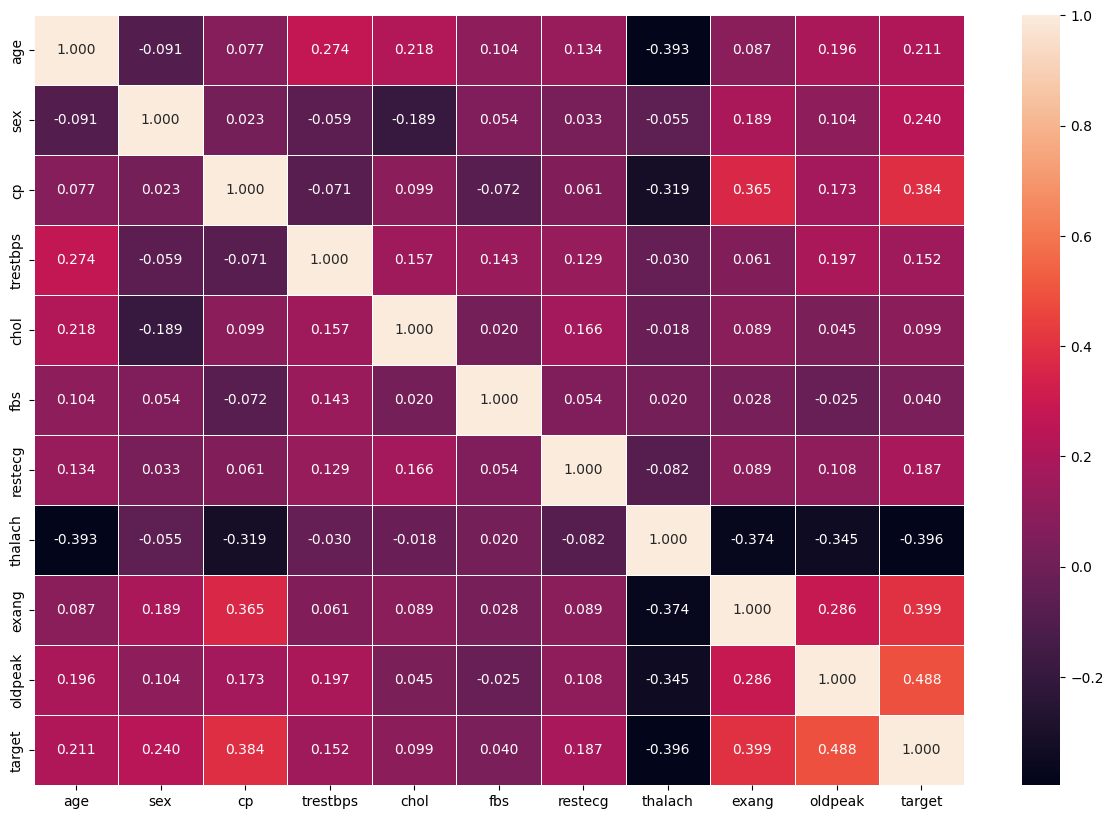

In [37]:
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

6) Konstruksi Data

Dalam tahap ini Konstruksi data salah satu tujuannya yaitu untuk menyesuaikan semua tipe data yang ada di dalam dataset. Namun pada
tahap ini dataset sudah memiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian kembali

In [38]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 281
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  target    282 non-null    float64
dtypes: float64(11)
memory usage: 26.4 KB


In [39]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0.0


Setelah Menyesuaikan tipe dataset kita, kita harus memisahkan antara fitur dan target lalu simpan kedalam variabel.

In [40]:
X = dfClean.drop("target",axis=1).values
y = dfClean.iloc[:,-1]

Setelah kita memisahkan antara fitur dan target , sebaiknya kita melakukan pengecekan terlebih dahulu terhadap persebaran jumlah target
terlebih dahulu.

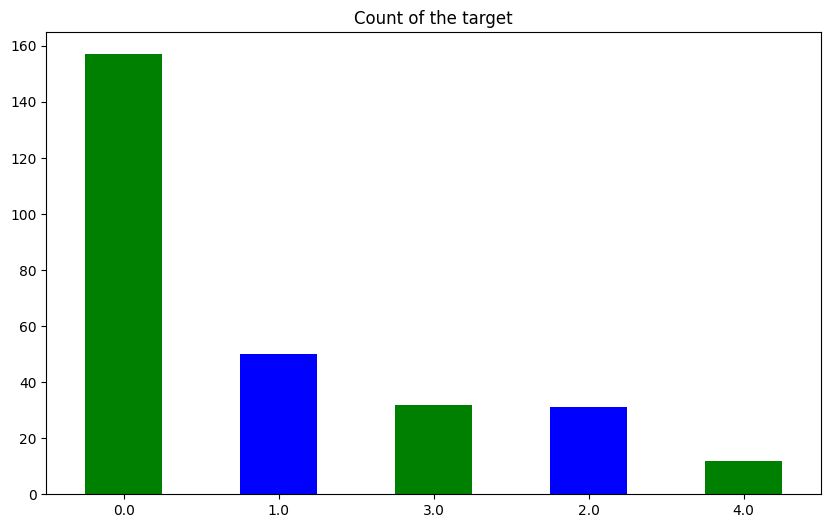

In [41]:
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0);

Pada Grafik diatas menunjukan bahwa persebaran jumlah target tidak seimbang oleh karena itu perlu diseimbangkan terlebih dahulu.
Menyeimbangkan target ada 2 cara yaitu oversampling dan undersampling. oversampling dilakukan jika jumlah dataset sedikit sedangkan
undersampling dilakukan jika jumlah data terlalu banyak.

Disini kita akan melakukan oversampling dikarenakan jumlah data kita tidak banyak. Salah satu metode yang Oversampling yang akan kita
gunakan adalah SMOTE

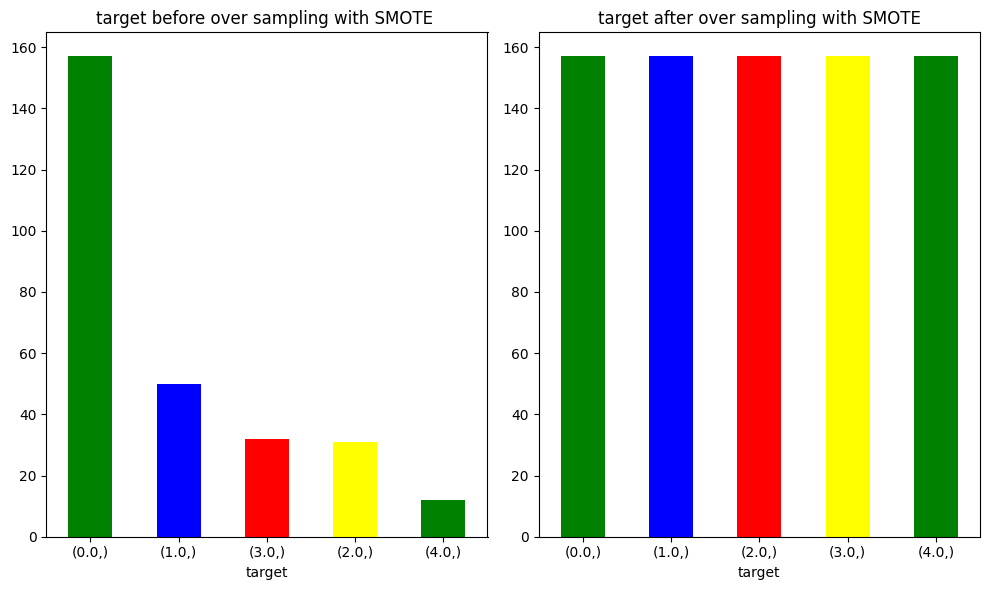

In [42]:
from imblearn.over_sampling import SMOTE
# oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)
plt.figure(figsize=(12, 4))
new_df1 = pd.DataFrame(data=y)
plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);
plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);
plt.tight_layout()
plt.show()

Pada Grafik diatas dapat dilihat ketika target belum di seimbangkan dan sudah diseimbangkan menggunakan oversampling.

In [43]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       157
1.0        50
3.0        32
2.0        31
4.0        12
dtype: int64

Setelah menyeimbangkan persebaran jumlah target kita akan melakukan mengecekan apakah perlu dilakukan normalisasi/standarisasi pada
datset kita.

In [44]:
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       157
1.0       157
2.0       157
3.0       157
4.0       157
dtype: int64

In [45]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,4.000000


Pada deskripsi diatas dapat dilihat bahwa terdapat rentang nilai yang cukup jauh pada standar deviasi setiap fitur dataset yang kita miliki. Oleh
karena itu perlu dilakukan normalisasi/standarisasi agar memperkecil rentang antara standar deviasi setiap kolom.

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)
len(X_smote_resampled_normal)
935
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,0.559464,0.780670,0.811714,0.374562,0.285381,0.139624,0.602408,0.542282,0.455827,0.238190
std,0.168535,0.374987,0.283240,0.149318,0.111148,0.309894,0.441362,0.161043,0.443229,0.180595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.458333,0.659984,0.666667,0.264151,0.207870,0.000000,0.000000,0.423142,0.000000,0.092091
50%,0.583333,1.000000,1.000000,0.358491,0.280822,0.000000,0.887086,0.543578,0.348039,0.225806
75%,0.678864,1.000000,1.000000,0.469468,0.356164,0.000000,1.000000,0.668935,1.000000,0.370968
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Setelah dilakukan normalisasi pada fitur, selanjutnya kita perlu membagi fitur dan target menjadi data train dan test.

7) Model
Pada tahap ini kita akan memulai untuk membangun sebuah model.

Dibawah ini merupakan sebuah fungsi untuk menampilkan hasil akurasi dan rata - rata dari recall , f1 dan precision score setiap model. Fungsi
ini nantinya akan dipanggil di setiap model. Membuat Fungsi ini bersifat opsional.

In [47]:
from sklearn.model_selection import train_test_split
# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)
# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

In [48]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score
def evaluation(Y_test,Y_pred):
  acc = accuracy_score(Y_test,Y_pred)
  rcl = recall_score(Y_test,Y_pred,average = 'weighted')
  f1 = f1_score(Y_test,Y_pred,average = 'weighted')
  ps = precision_score(Y_test,Y_pred,average = 'weighted')
  metric_dict={'accuracy': round(acc,3),
      'recall': round(rcl,3),
      'F1 score': round(f1,3),
      'Precision score': round(ps,3)
      }
  return print(metric_dict)

Oversample


KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Berikut adalah kode program untuk menampilkan hasil akurasi dengan algoritma KNN

In [50]:
y_pred_knn = knn_model.predict(X_test)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.688
Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.53      0.54        32
         1.0       0.59      0.71      0.65        31
         2.0       0.76      0.84      0.80        31
         3.0       0.76      0.69      0.72        32
         4.0       0.81      0.68      0.74        31

    accuracy                           0.69       157
   macro avg       0.69      0.69      0.69       157
weighted avg       0.69      0.69      0.69       157



In [51]:
evaluation(y_test,y_pred_knn)

{'accuracy': 0.688, 'recall': 0.688, 'F1 score': 0.688, 'Precision score': 0.694}


Pada visualisasi ini ditampilkan visualisasi confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya.


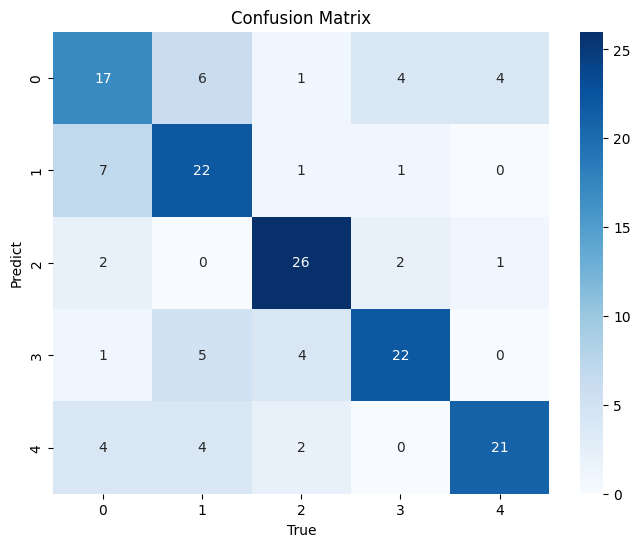

In [52]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

Random Forest


Selanjutnya kita akan membangun model dengan algoritma random forest dengan n_estimators yaitu 100, n_estimators sendiri berguna mengatur jumlah pohon keputusan yang akan dibangun

In [53]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
y_pred_rf = rf_model.predict(X_test)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.911
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92        32
         1.0       0.79      0.87      0.83        31
         2.0       0.88      0.97      0.92        31
         3.0       0.96      0.84      0.90        32
         4.0       1.00      0.97      0.98        31

    accuracy                           0.91       157
   macro avg       0.92      0.91      0.91       157
weighted avg       0.92      0.91      0.91       157



In [55]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.911, 'recall': 0.911, 'F1 score': 0.912, 'Precision score': 0.916}


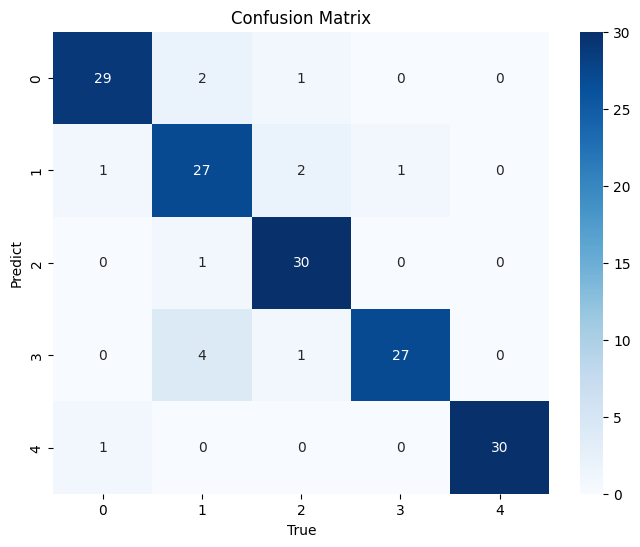

In [56]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

XGBoost

Pada tahap ini dalam membangun model, kita akan menggunakan algoritma XGBoost dengan learning rate yaitu 0.1. learning rate berguna
untuk mengontrol seberapa besar kita menyesuaikan bobot model.

In [57]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [58]:
y_pred_xgb = xgb_model.predict(X_test)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model:
Accuracy: 0.917
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        32
         1.0       0.93      0.90      0.92        31
         2.0       0.90      0.90      0.90        31
         3.0       0.90      0.88      0.89        32
         4.0       1.00      0.97      0.98        31

    accuracy                           0.92       157
   macro avg       0.92      0.92      0.92       157
weighted avg       0.92      0.92      0.92       157



In [59]:
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.917, 'recall': 0.917, 'F1 score': 0.918, 'Precision score': 0.919}


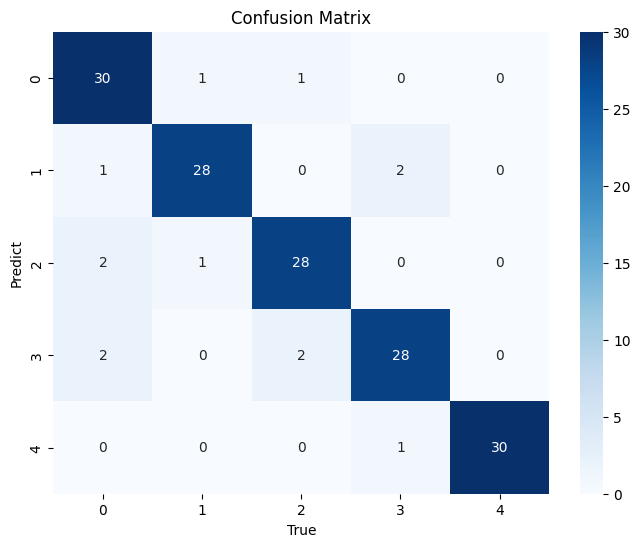

In [60]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

Oversample + Normalisasi


Pada bagian ini kita akan membuat sebuah model yang dimana data yang dipakai kali ini yang sudah dilakukan oversample dan normalisasi.
Algoritma yang digunakan sama seperti sebelumnya yaitu KNN, Random Forest, dan XGBoost. Sekaligus dibuat visualisasi hasil evaluasi pada
masing-masing model.


KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [62]:
y_pred_knn = knn_model.predict(X_test_normal)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.803
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84        32
         1.0       0.63      0.61      0.62        31
         2.0       0.87      0.87      0.87        31
         3.0       0.85      0.69      0.76        32
         4.0       0.82      1.00      0.90        31

    accuracy                           0.80       157
   macro avg       0.80      0.80      0.80       157
weighted avg       0.80      0.80      0.80       157



In [63]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.803, 'recall': 0.803, 'F1 score': 0.799, 'Precision score': 0.803}


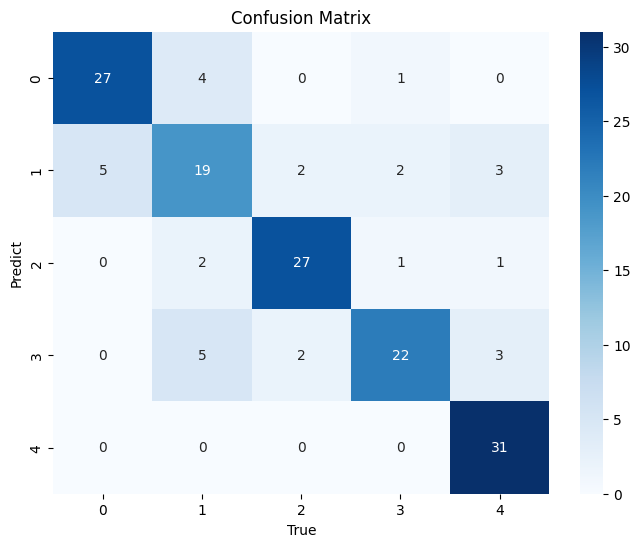

In [64]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

Random Forest

In [65]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [66]:
y_pred_rf = rf_model.predict(X_test_normal)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))



Random Forest Model:
Accuracy: 0.911
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92        32
         1.0       0.79      0.87      0.83        31
         2.0       0.88      0.97      0.92        31
         3.0       0.96      0.84      0.90        32
         4.0       1.00      0.97      0.98        31

    accuracy                           0.91       157
   macro avg       0.92      0.91      0.91       157
weighted avg       0.92      0.91      0.91       157



In [67]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.911, 'recall': 0.911, 'F1 score': 0.912, 'Precision score': 0.916}


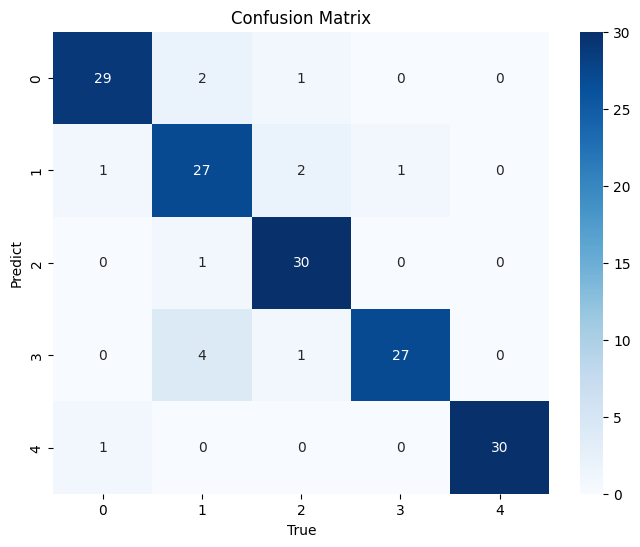

In [68]:
cm = confusion_matrix(y_test_normal, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


XGBoost


In [69]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [70]:
y_pred_xgb = xgb_model.predict(X_test_normal)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.917
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        32
         1.0       0.93      0.90      0.92        31
         2.0       0.90      0.90      0.90        31
         3.0       0.90      0.88      0.89        32
         4.0       1.00      0.97      0.98        31

    accuracy                           0.92       157
   macro avg       0.92      0.92      0.92       157
weighted avg       0.92      0.92      0.92       157



In [71]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.917, 'recall': 0.917, 'F1 score': 0.918, 'Precision score': 0.919}


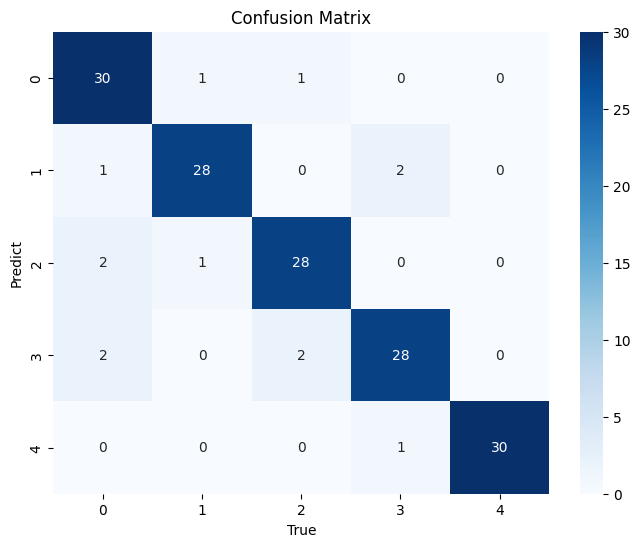

In [72]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


Tunning + Normalization + Oversample

Pada pembuatan model kali ini masih menggunakan algoritma yang sama (KNN, Random Forest, dan XGBoost), namun data yang digunakan
adalah data yang sudah dilakukan TunNIng Parameter, Normalisasi, dan Oversample.

KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV


Setiap parameter tunnning tidak selalu sama karena bergantung pada algoritma yang digunakan.

In [74]:
knn_model = KNeighborsClassifier()
param_grid = {
"n_neighbors": range(3, 21),
"metric": ["euclidean", "manhattan", "chebyshev"],
"weights": ["uniform", "distance"],
"algorithm": ["auto", "ball_tree", "kd_tree"],
"leaf_size": range(10, 61),
}
knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)
knn_model.fit(X_train_normal, y_train_normal)
best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan', 'leaf_size': 26, 'algorithm': 'auto'}


In [75]:
y_pred_knn = knn_model.predict(X_test_normal)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.879
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.84      0.92        32
         1.0       0.83      0.77      0.80        31
         2.0       0.82      0.90      0.86        31
         3.0       0.90      0.88      0.89        32
         4.0       0.86      1.00      0.93        31

    accuracy                           0.88       157
   macro avg       0.88      0.88      0.88       157
weighted avg       0.88      0.88      0.88       157



In [76]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.879, 'recall': 0.879, 'F1 score': 0.879, 'Precision score': 0.884}


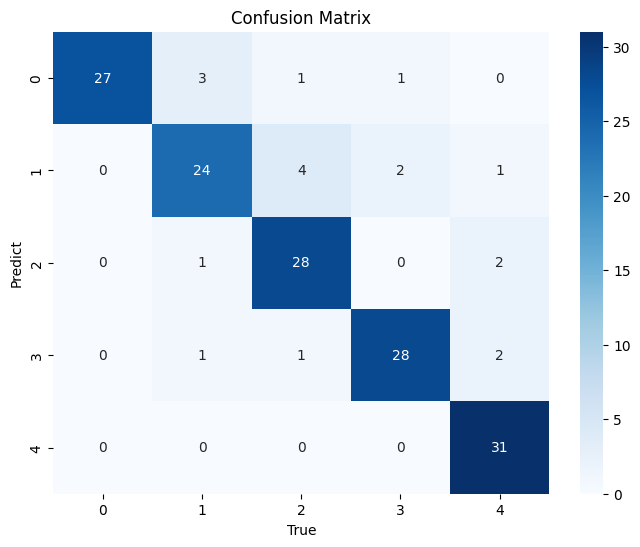

In [77]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

Random Forest

In [78]:
rf_model = RandomForestClassifier()
param_grid = {
"n_estimators": [100, 200],
"max_depth": [ 10, 15],
"min_samples_leaf": [1, 2],
"min_samples_split": [2, 5],
"max_features": ["sqrt", "log2"],
# "random_state": [42, 100, 200]
}
rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)
rf_model.fit(X_train_normal, y_train_normal)
best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}


In [79]:
y_pred_rf = rf_model.predict(X_test_normal)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        32
         1.0       0.87      0.87      0.87        31
         2.0       0.89      1.00      0.94        31
         3.0       0.93      0.81      0.87        32
         4.0       1.00      1.00      1.00        31

    accuracy                           0.93       157
   macro avg       0.93      0.93      0.93       157
weighted avg       0.93      0.93      0.93       157



In [80]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.93, 'recall': 0.93, 'F1 score': 0.929, 'Precision score': 0.931}


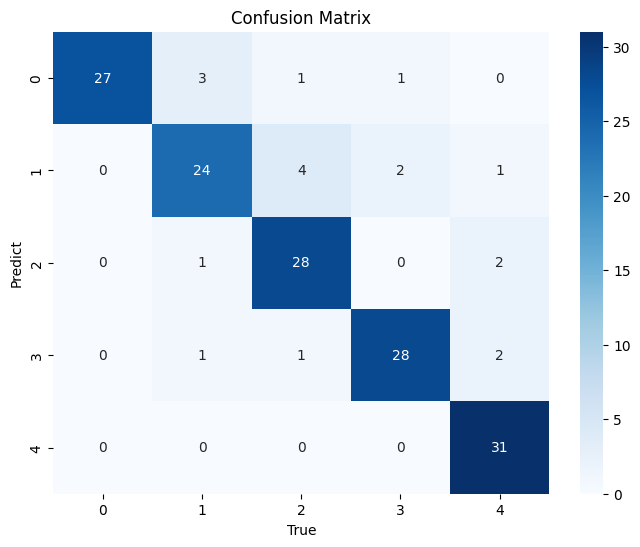

In [81]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

XGBoost

In [82]:
xgb_model = XGBClassifier()
param_grid = {
"max_depth": [3, 5, 7],
"learning_rate": [0.01, 0.1],
"n_estimators": [100, 200],
"gamma": [0, 0.1],
"colsample_bytree": [0.7, 0.8],
}
xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)
xgb_model.fit(X_train_normal, y_train_normal)
best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [83]:
y_pred_xgb = xgb_model.predict(X_test_normal)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.873
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89        32
         1.0       0.83      0.81      0.82        31
         2.0       0.85      0.90      0.88        31
         3.0       0.87      0.84      0.86        32
         4.0       0.93      0.90      0.92        31

    accuracy                           0.87       157
   macro avg       0.87      0.87      0.87       157
weighted avg       0.87      0.87      0.87       157



In [84]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.873, 'recall': 0.873, 'F1 score': 0.872, 'Precision score': 0.873}


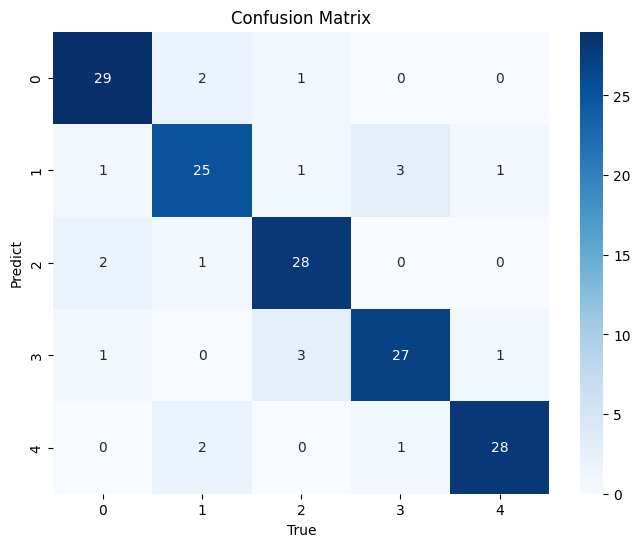

In [85]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

8) Evaluasi

Selanjutnya kita akan melakukan evaluasi data sekaligus membandingkan antar algoritma guna dengan tujuan mengetahui jenis model
algoritma yang menghasilkan hasil akurasi terbaik.

In [86]:
import matplotlib.pyplot as plt
model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
'XGBoost'], 'Accuracy': [accuracy_knn_smote*100,
accuracy_rf_smote*100,accuracy_xgb_smote*100]})
model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,68.8
1,Random Forest,91.1
2,XGBoost,91.7


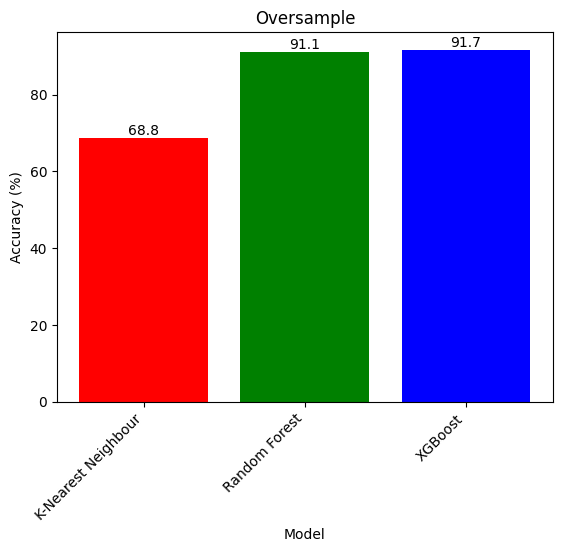

In [87]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()


In [88]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal*100,
accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})
model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,80.3
1,Random Forest,91.1
2,XGBoost,91.7


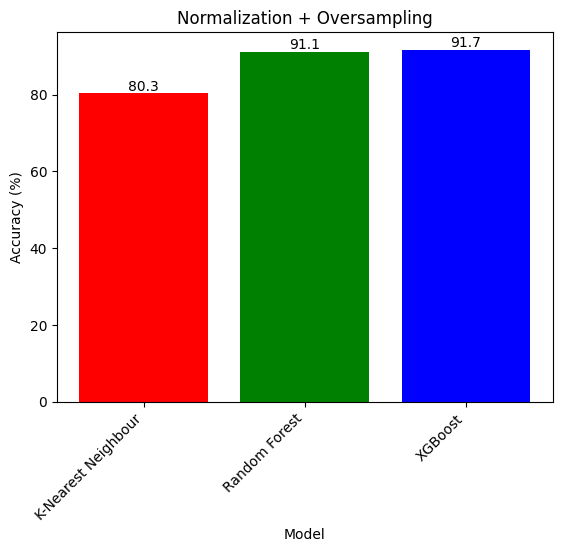

In [89]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()


In [90]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal_Tun*100,
accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})
model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,87.9
1,Random Forest,93.0
2,XGBoost,87.3


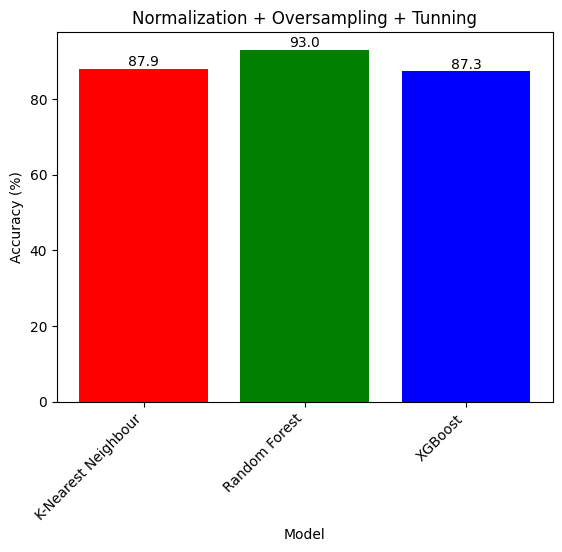

In [91]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()


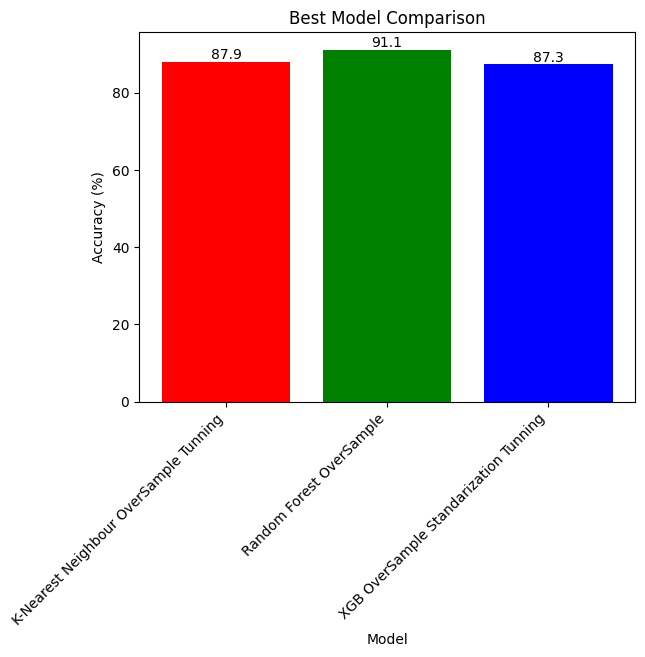

In [92]:
# Data frame
model_compBest = pd.DataFrame({
    'Model': ['K-Nearest Neighbour OverSample Tunning', 'Random Forest OverSample',
        'XGB OverSample Standarization Tunning'],
    'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal*100,
                accuracy_xgb_smote_normal_Tun*100]
})
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()


Kesimpulan

Dari penelitian diatas setelah melakukan pemodelan dengan algoritma KNN, Random Forest, dan XGBoost dengan berbagai penanganan data
antara lain menggunakan random over sampling SMOTE untuk penanganan imbalance data, RandomSearchCV untuk tunning, dan Normalisasi
data. Dapat disimpulkan bahwa klasifikasi menggunakan Random Over Sampling SMOTE pada model KNN menghasilkan akurasi 68.8 %,
model Random Forest dengan akurasi yang dihasilkan yaitu 91.1%, dan model XGBoots menghasilkan akurasi 91.7%. Disamping itu bila
klasifikasi menggunakan data yang sudah dilakukan normalisasi dan Random Over Sampling SMOTE pada model KNN menghasilkan akurasi
80.3%, model Random Forest menghasilkan akurasi 91.1%, dan model XGBoots menghasilkan akurasi 91.7%. Dan pada klasifikasi menggunakan
data yang telah dilakukan tunning RandomSearchCV, normalisasi, dan Random Over Sampling SMOTE dalam model KNN menghasilkan akurasi
87.9%, pada model Random Forest menghasilkan akurasi 93.0%. dan model XGBoots menghasilkan akurasi 87.3%. Oleh karena itu, dalam
penanganan data yang optimal untuk mengatasi ketidakseimbangan data adalah dengan menggunakan metode random Oversampling SMOTE
sekaligus yang dilengkapi dengan tuning menggunakan RandomSearchCV dan normalisasi data, memberikan hasil yang signifikan dalam
meningkatkan akurasi model klasifikasi khususnya pada model KNN dan XGBoots, namun hal itu tidak terjadi pada model Random Forest yang
mengalami penurunan akurasi yang signifikan. Secara keseluruhan, penanganan dalam ketidakseimbangan data dengan menggunakan tunning
parameter, normalisasi, dan oversampling dapat memberikan dampak signifikan terhadap performa model klasifikasi. Pemilihan model terbaik
dan parameter optimal dapat meningkatkan akurasi dan kinerja model secara keseluruhan.
